<a href="https://colab.research.google.com/github/NLohithReddy/Hearing-test-logistic-regression/blob/main/hearing_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
# Cleaning data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df)
dataset = imp.transform(df)

In [5]:
dataset

array([[33. , 40.7,  1. ],
       [50. , 37.2,  1. ],
       [52. , 24.7,  0. ],
       ...,
       [49. , 34.5,  1. ],
       [38. , 46.4,  1. ],
       [48. , 38.5,  1. ]])

In [6]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [9]:
from sklearn.preprocessing import PolynomialFeatures


#Polynomial the Data
#The purpose of generating polynomial features is to
#capture non-linear relationships between features,
#which can be useful for certain machine learning models that can benefit from such feature engineering
#degree can be 1 2 and 3 and more than that if more complex relationships can lead to overfitting

scaler = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
X = scaler.fit_transform(X)

In [8]:
#showing data
print('X \n' , X[:10])
print('Y \n' , Y[:10])

X 
 [[1.0000000e+00 3.3000000e+01 4.0700000e+01 1.0890000e+03 1.3431000e+03
  1.6564900e+03 3.5937000e+04 4.4322300e+04 5.4664170e+04 6.7419143e+04]
 [1.0000000e+00 5.0000000e+01 3.7200000e+01 2.5000000e+03 1.8600000e+03
  1.3838400e+03 1.2500000e+05 9.3000000e+04 6.9192000e+04 5.1478848e+04]
 [1.0000000e+00 5.2000000e+01 2.4700000e+01 2.7040000e+03 1.2844000e+03
  6.1009000e+02 1.4060800e+05 6.6788800e+04 3.1724680e+04 1.5069223e+04]
 [1.0000000e+00 5.6000000e+01 3.1000000e+01 3.1360000e+03 1.7360000e+03
  9.6100000e+02 1.7561600e+05 9.7216000e+04 5.3816000e+04 2.9791000e+04]
 [1.0000000e+00 3.5000000e+01 4.2900000e+01 1.2250000e+03 1.5015000e+03
  1.8404100e+03 4.2875000e+04 5.2552500e+04 6.4414350e+04 7.8953589e+04]
 [1.0000000e+00 5.8000000e+01 2.3000000e+01 3.3640000e+03 1.3340000e+03
  5.2900000e+02 1.9511200e+05 7.7372000e+04 3.0682000e+04 1.2167000e+04]
 [1.0000000e+00 6.6000000e+01 2.8900000e+01 4.3560000e+03 1.9074000e+03
  8.3521000e+02 2.8749600e+05 1.2588840e+05 5.5123860e

In [10]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

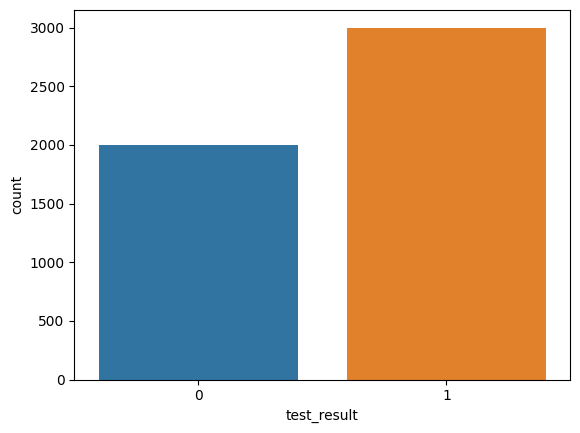

In [11]:
# Count Plot to know data on test results
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

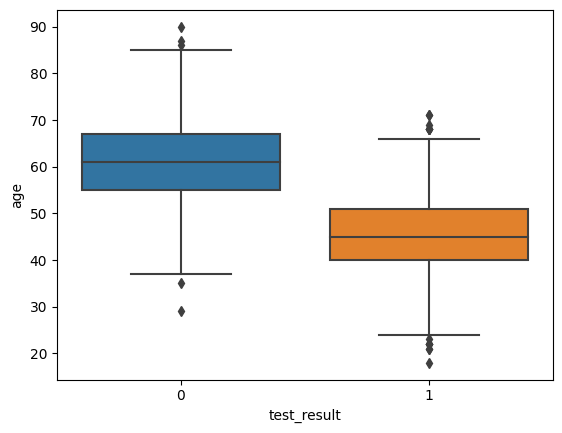

In [12]:
# Box Plot to establish relation between Test result and Age
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result',y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

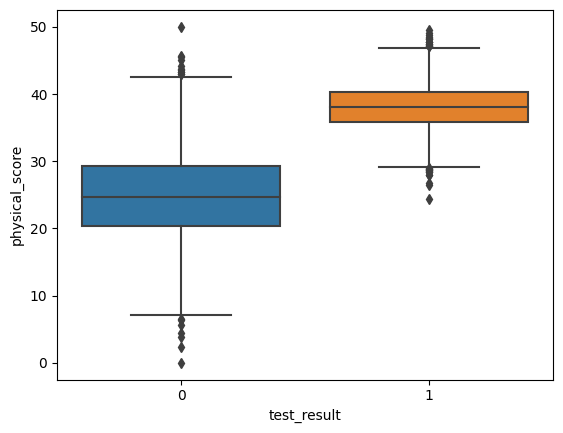

In [13]:
# Box Plot to establish relation between Test result and physical_score
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result',y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

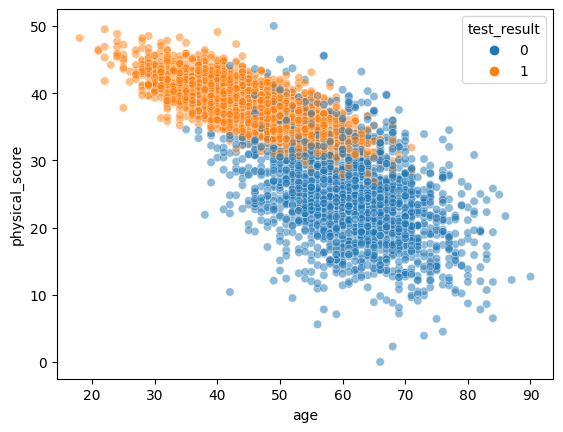

In [14]:
plt.figure(dpi=100)
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result',alpha=0.5)
#This code will create a scatterplot that visualizes the relationship between 'age' and 'physical_score,'
# while also showing how 'test_result' categories are distributed among the data points, using different colors.
#The alpha value controls the transparency of the points, allowing you to see overlapping data points more clearly.







In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=44)

In [17]:
scaler =  StandardScaler()

In [18]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
log_model.fit(scaled_X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.944

In [23]:
confusion_matrix(y_test,y_pred)

array([[ 76,  10],
       [  4, 160]])

In [24]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.95      0.88      0.92        86\n         1.0       0.94      0.98      0.96       164\n\n    accuracy                           0.94       250\n   macro avg       0.95      0.93      0.94       250\nweighted avg       0.94      0.94      0.94       250\n'

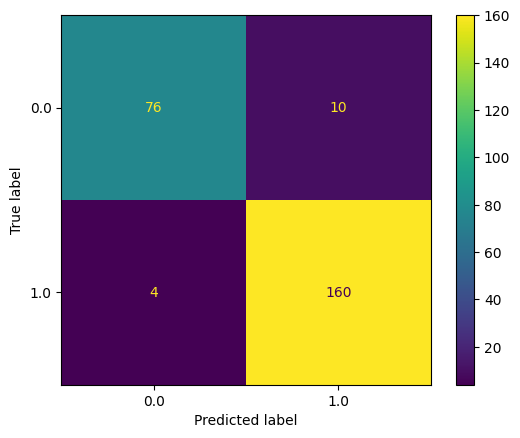

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)